In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heights (1).csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.tail()

,gender,height
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243
9999,Female,61.944246


In [4]:
df.shape

(10000, 2)

In [5]:
df.columns

Index(['gender', 'height'], dtype='object')

In [6]:
df.dtypes

gender     object
height    float64
dtype: object

In [7]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


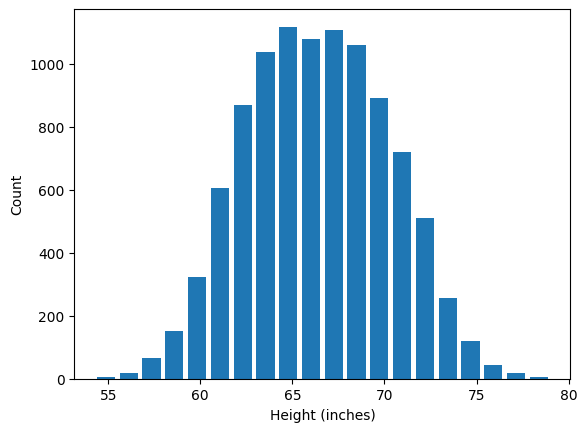

In [8]:
plt.hist(df['height'],bins=20,rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

In [9]:
df['height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

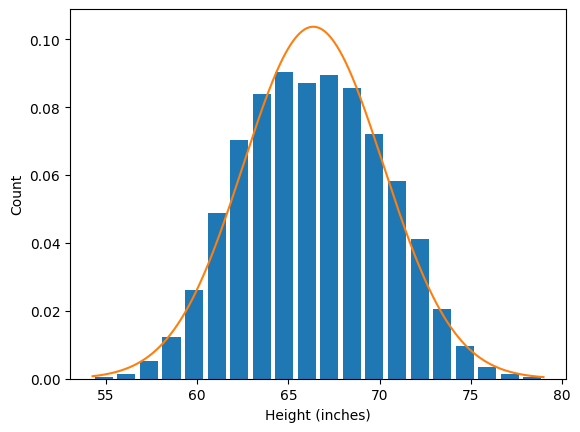

In [10]:
from scipy.stats import norm

plt.hist(df['height'],bins=20,rwidth=0.8,density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
rng=np.arange(df['height'].min(),df['height'].max(),0.01)
plt.plot(rng,norm.pdf(rng,df['height'].mean(),df['height'].std()))

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm

# # Calculate mean and std
# mean = df['height'].mean()
# std = df['height'].std()

# # Plot histogram
# plt.hist(df['height'], bins=20, rwidth=0.8, density=True)

# # Create range for curve
# rng = np.arange(df['height'].min(), df['height'].max(), 0.1)

# # Plot normal distribution curve
# plt.plot(rng, norm.pdf(rng, mean, std))

# # Plot mean line
# plt.axvline(mean, color='red', linestyle='--', label='Mean')

# # Plot +/- 1 std
# plt.axvline(mean - std, color='green', linestyle='--', label='±1 std')
# plt.axvline(mean + std, color='green', linestyle='--')

# # Plot +/- 2 std
# plt.axvline(mean - 2*std, color='blue', linestyle='--', label='±2 std')
# plt.axvline(mean + 2*std, color='blue', linestyle='--')

# # Plot +/- 3 std
# plt.axvline(mean - 3*std, color='purple', linestyle='--', label='±3 std')
# plt.axvline(mean + 3*std, color='purple', linestyle='--')

# plt.xlabel('Height (inches)')
# plt.ylabel('Density')
# plt.legend()
# plt.show()


In [12]:
df['height'].mean()

66.367559754866

In [13]:
df['height'].std()

3.847528120795573

In [14]:
upper_limit=df['height'].mean()+3*df['height'].std()
upper_limit

77.91014411725271

In [15]:
lower_limit=df['height'].mean()-3*df['height'].std()
lower_limit

54.824975392479274

In [16]:
df.loc[df['height']>upper_limit]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374


In [17]:
df.loc[df['height']<lower_limit]

,gender,height
6624,Female,54.616858
9285,Female,54.263133


The above data is outliers

In [18]:
final_df_std=df.loc[(df['height']<upper_limit) & (df['height']>lower_limit)]

In [19]:
df.shape

(10000, 2)

In [20]:
df.shape[0]-final_df_std.shape[0]

7

Here we removed 7 outliers (using standard deviation)

Z- score
--------

Z-score (also called standard score) is a statistical measure that tells you how many standard deviations a data point is away from the mean of a dataset.

z=(x−μ)/σ



x = the value

μ = mean

σ = standard deviation

In [21]:
z=(77.91014411725271-66.367559754866)/3.847528120795573

In [22]:
z

3.0

In [23]:
df['zscore']=(df['height']-df['height'].mean())/df['height'].std()
# this code is to find the zscore of each data points

In [24]:
df

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


z = 0 → at the mean

z = +1 → 1 std above mean

z = +3 → 3 std above mean

z > 3 → extremely high value (outlier)

In [30]:
df.loc[(df['zscore']>3)]
# This returns only those rows where the z-score is greater than 3.

# 🎯 Why 3?

# Because of the 68–95–99.7 rule:

# 99.7% of data lies within ±3 standard deviations

# Anything beyond 3 is extremely rare → outlier

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [26]:
df.loc[(df['zscore']<-3)]


,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [27]:
final_df_zscore=df.loc[(df['zscore']>-3)&(df['zscore']<3)]
final_df_zscore

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [28]:
df.shape[0]-final_df_zscore.shape[0]

7

Here we removed 7 outliers (using z-score)